## Unsupervised Learning

No target value

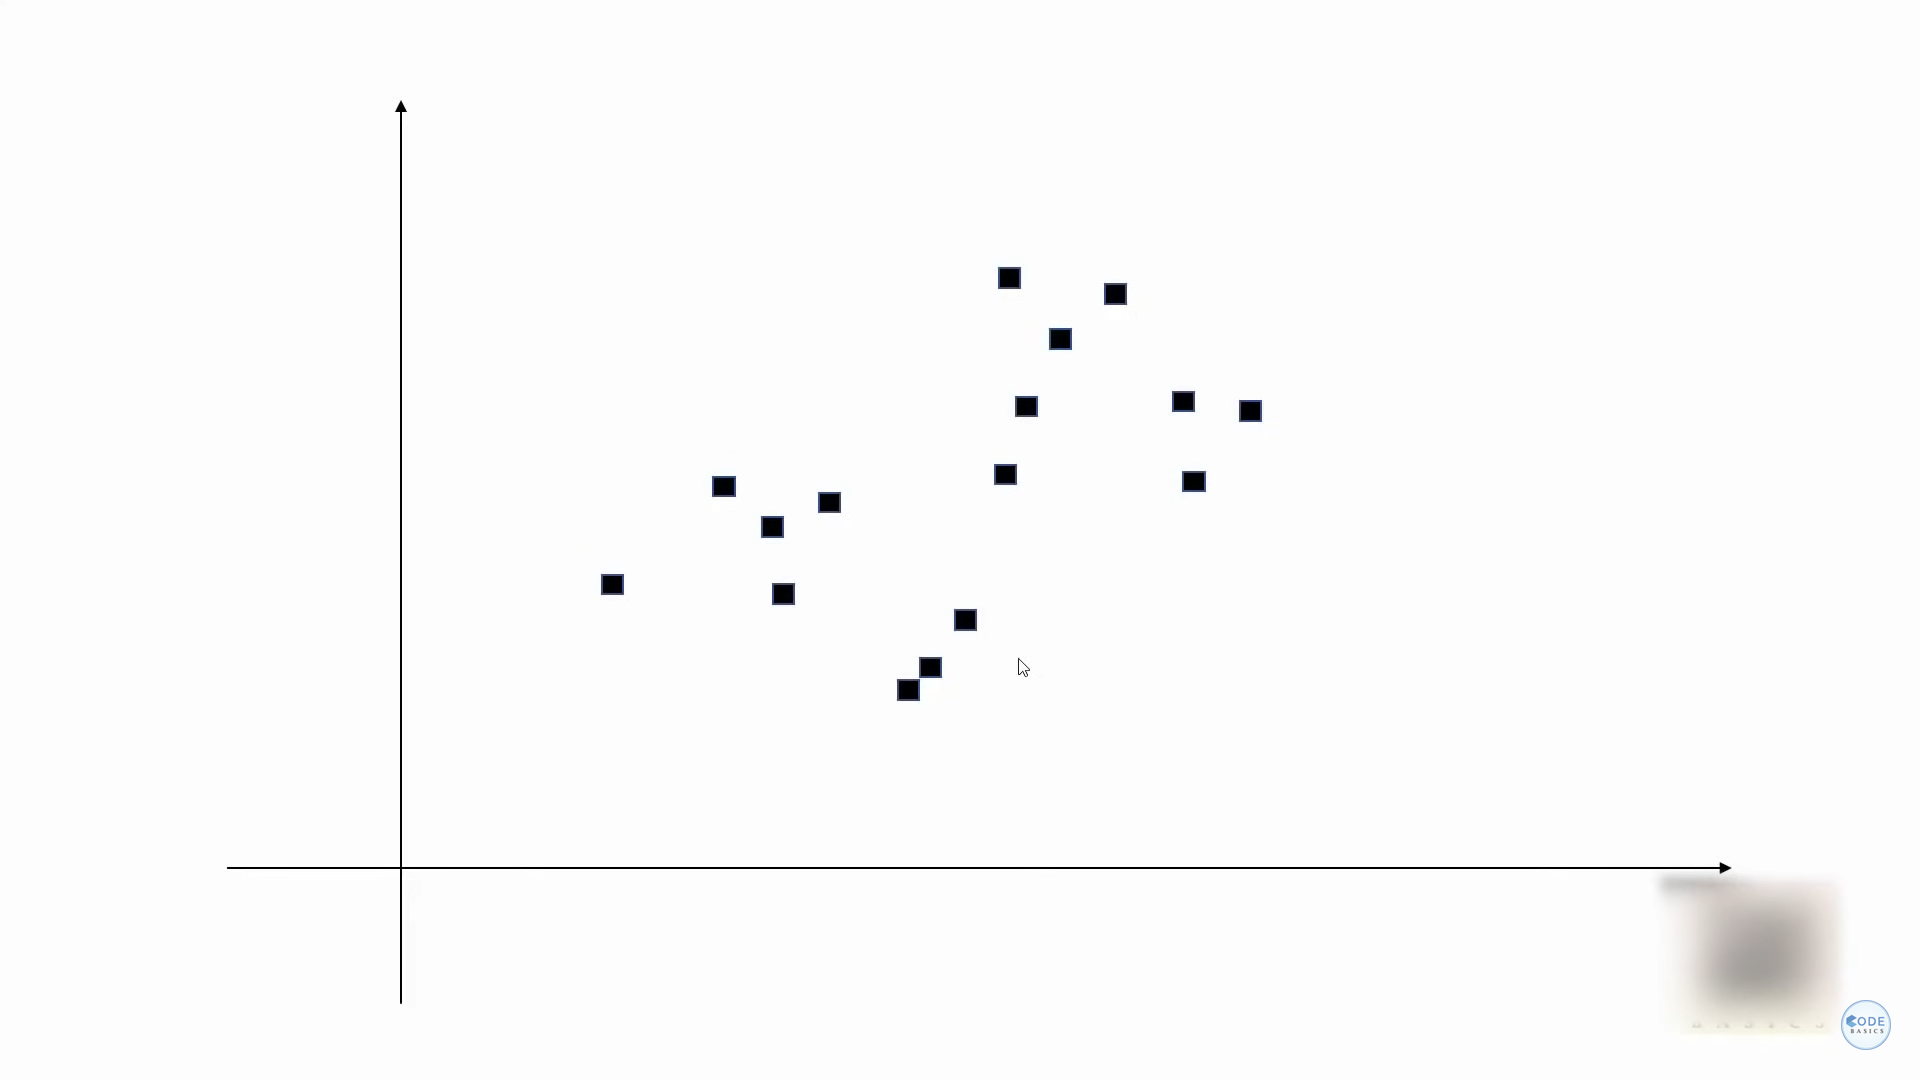

we will find the pattern using appropriate K value

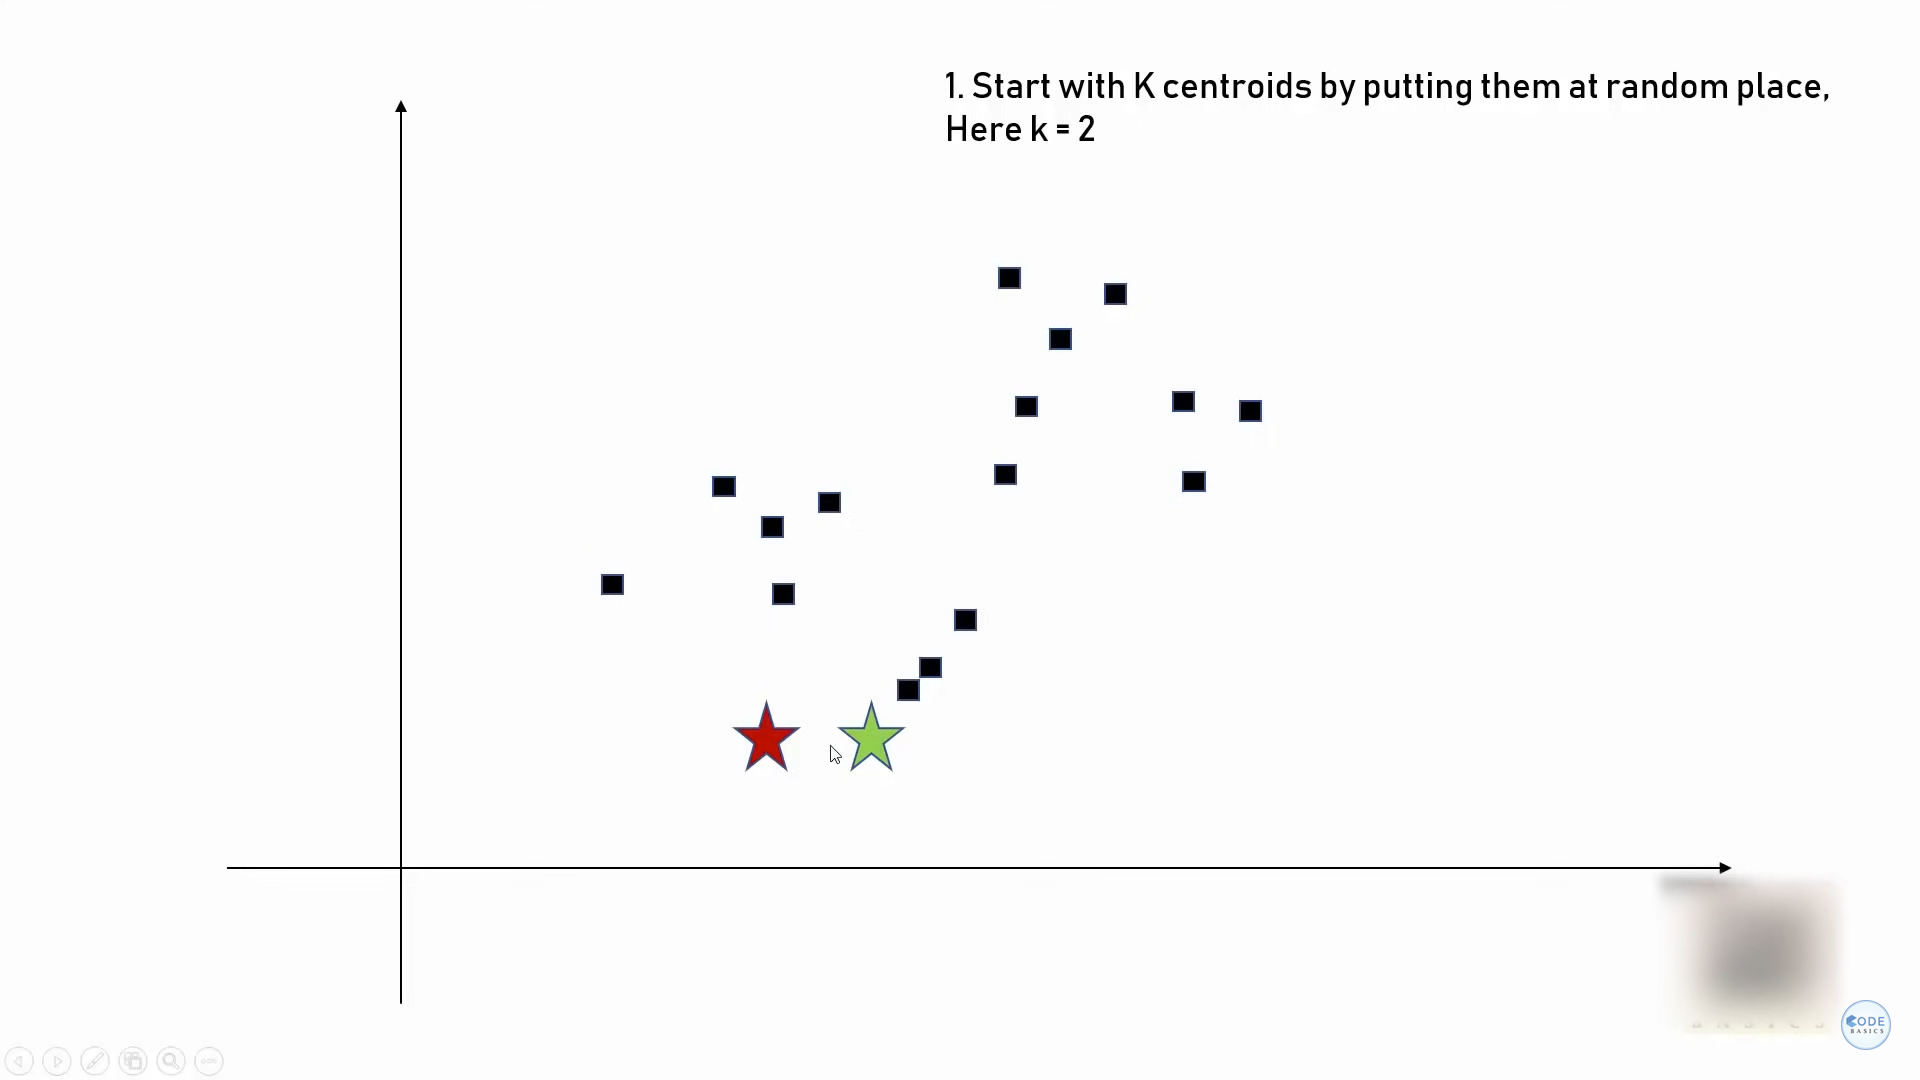

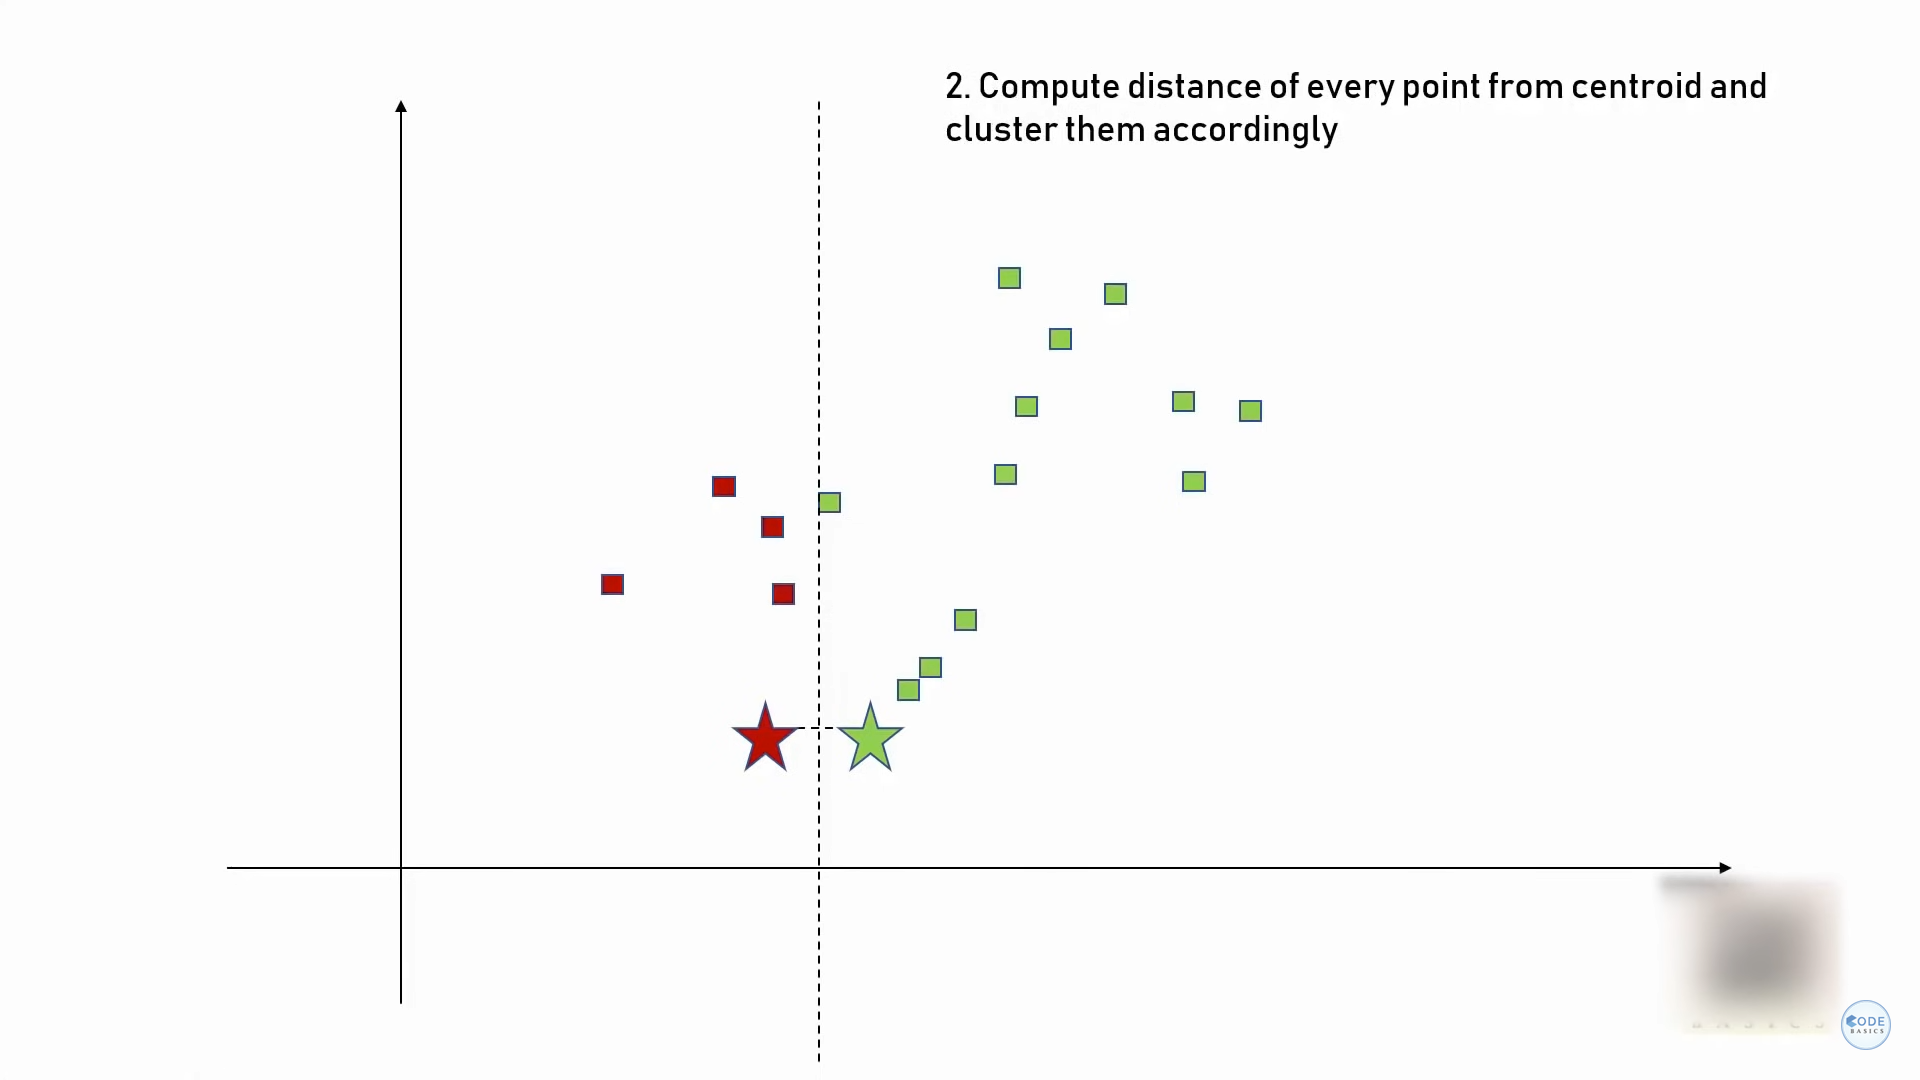

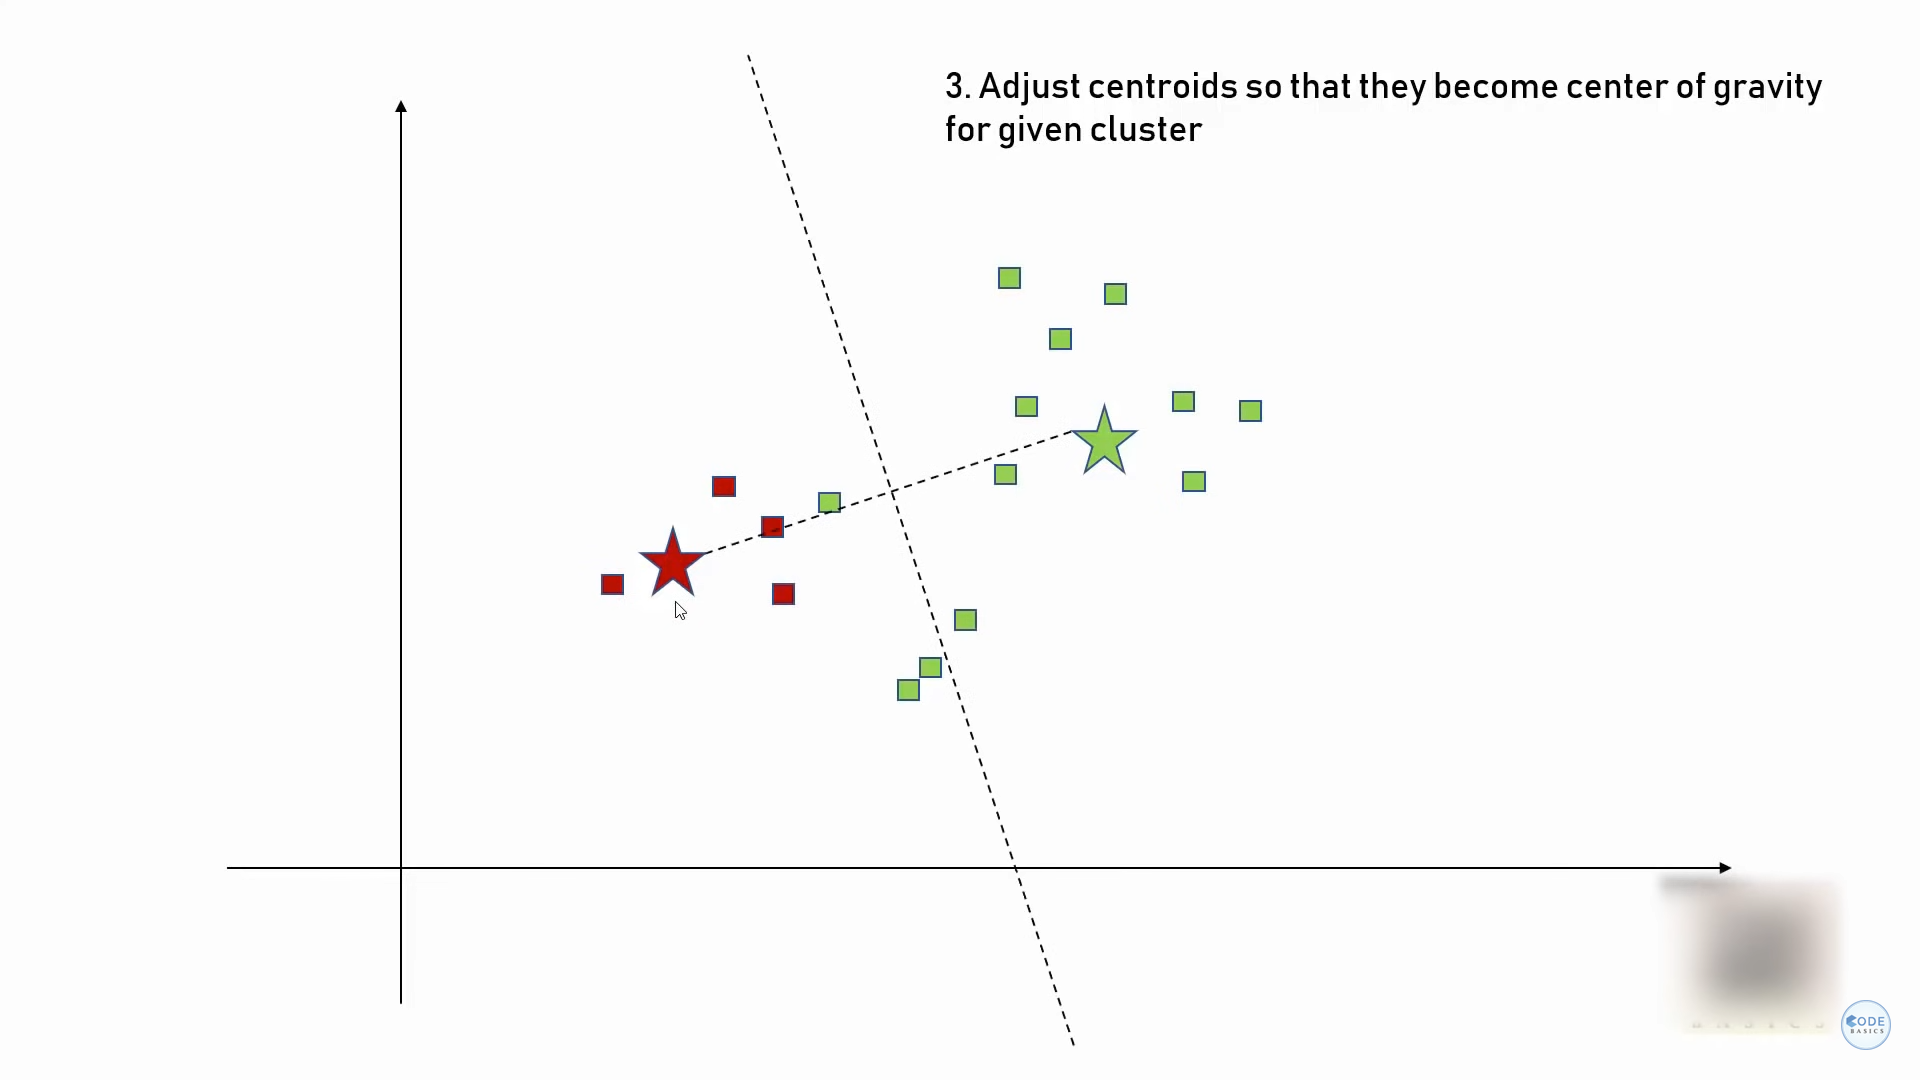

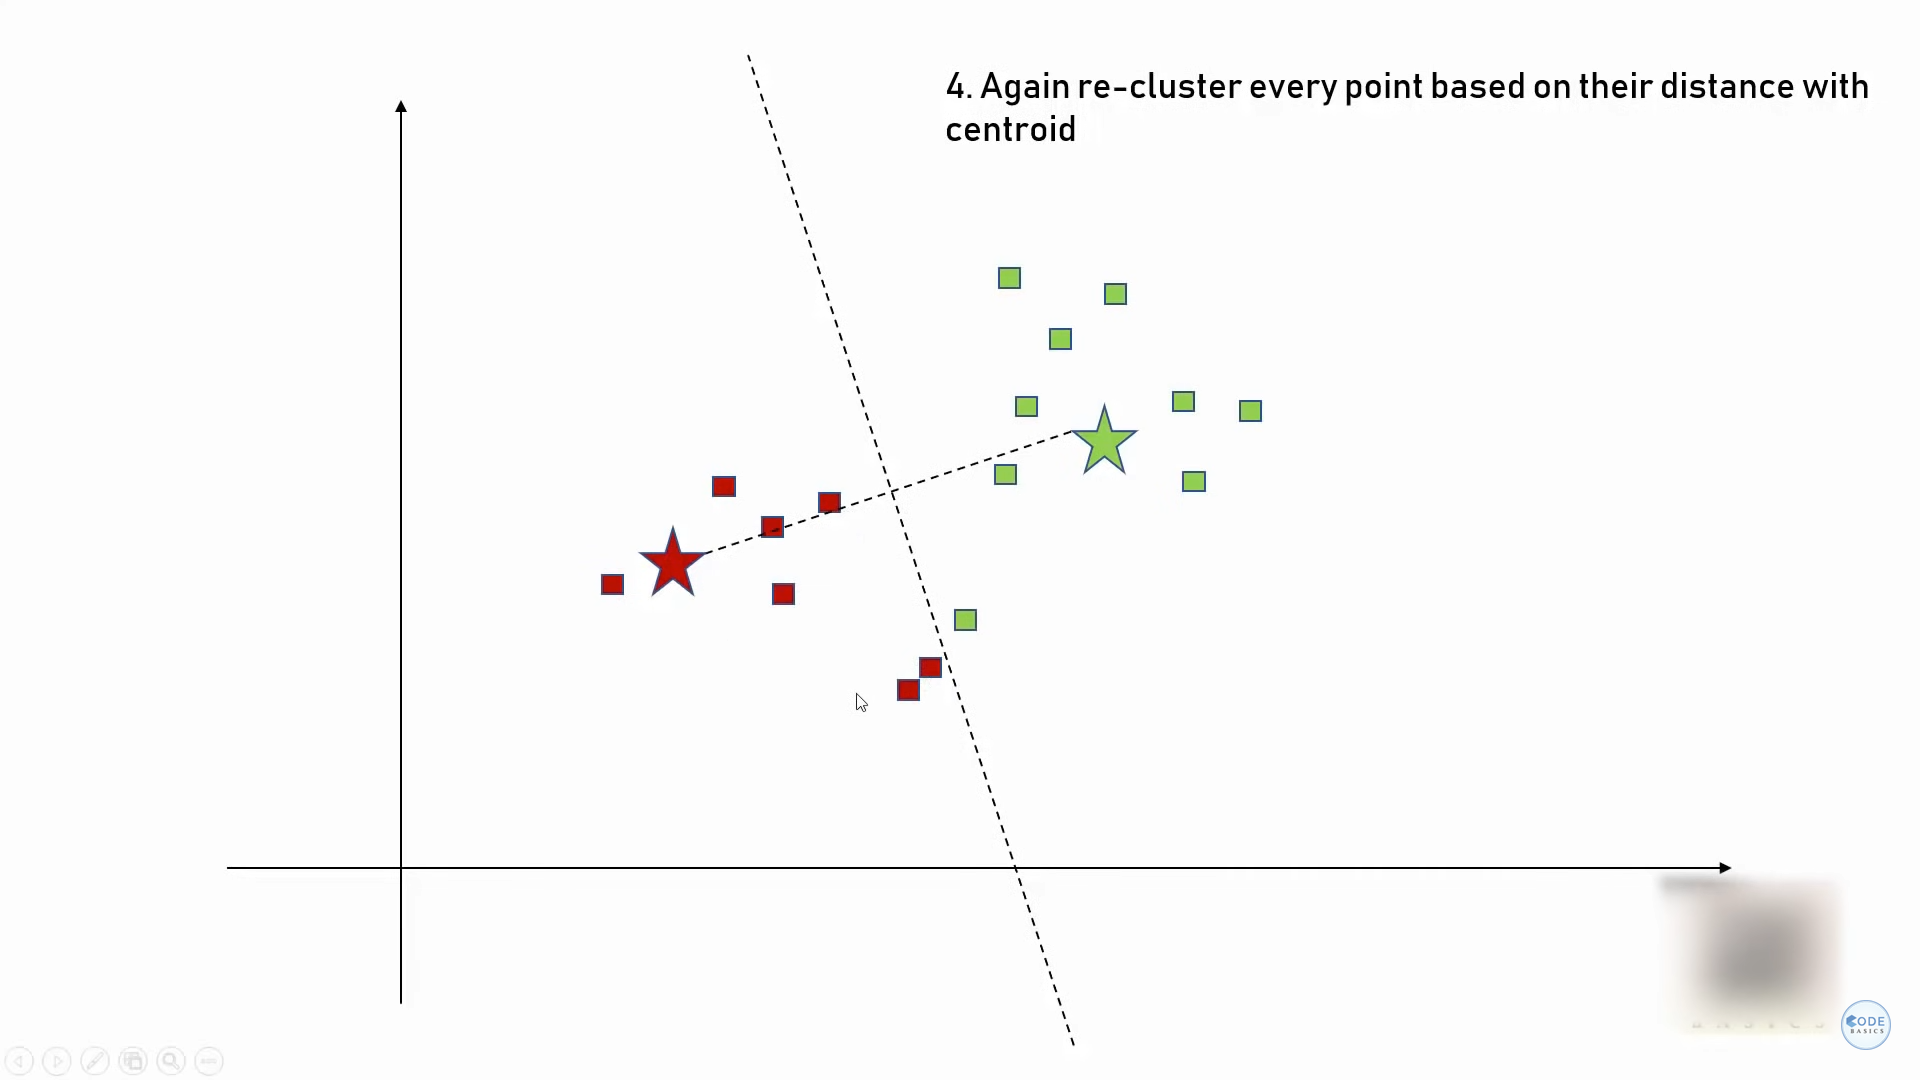

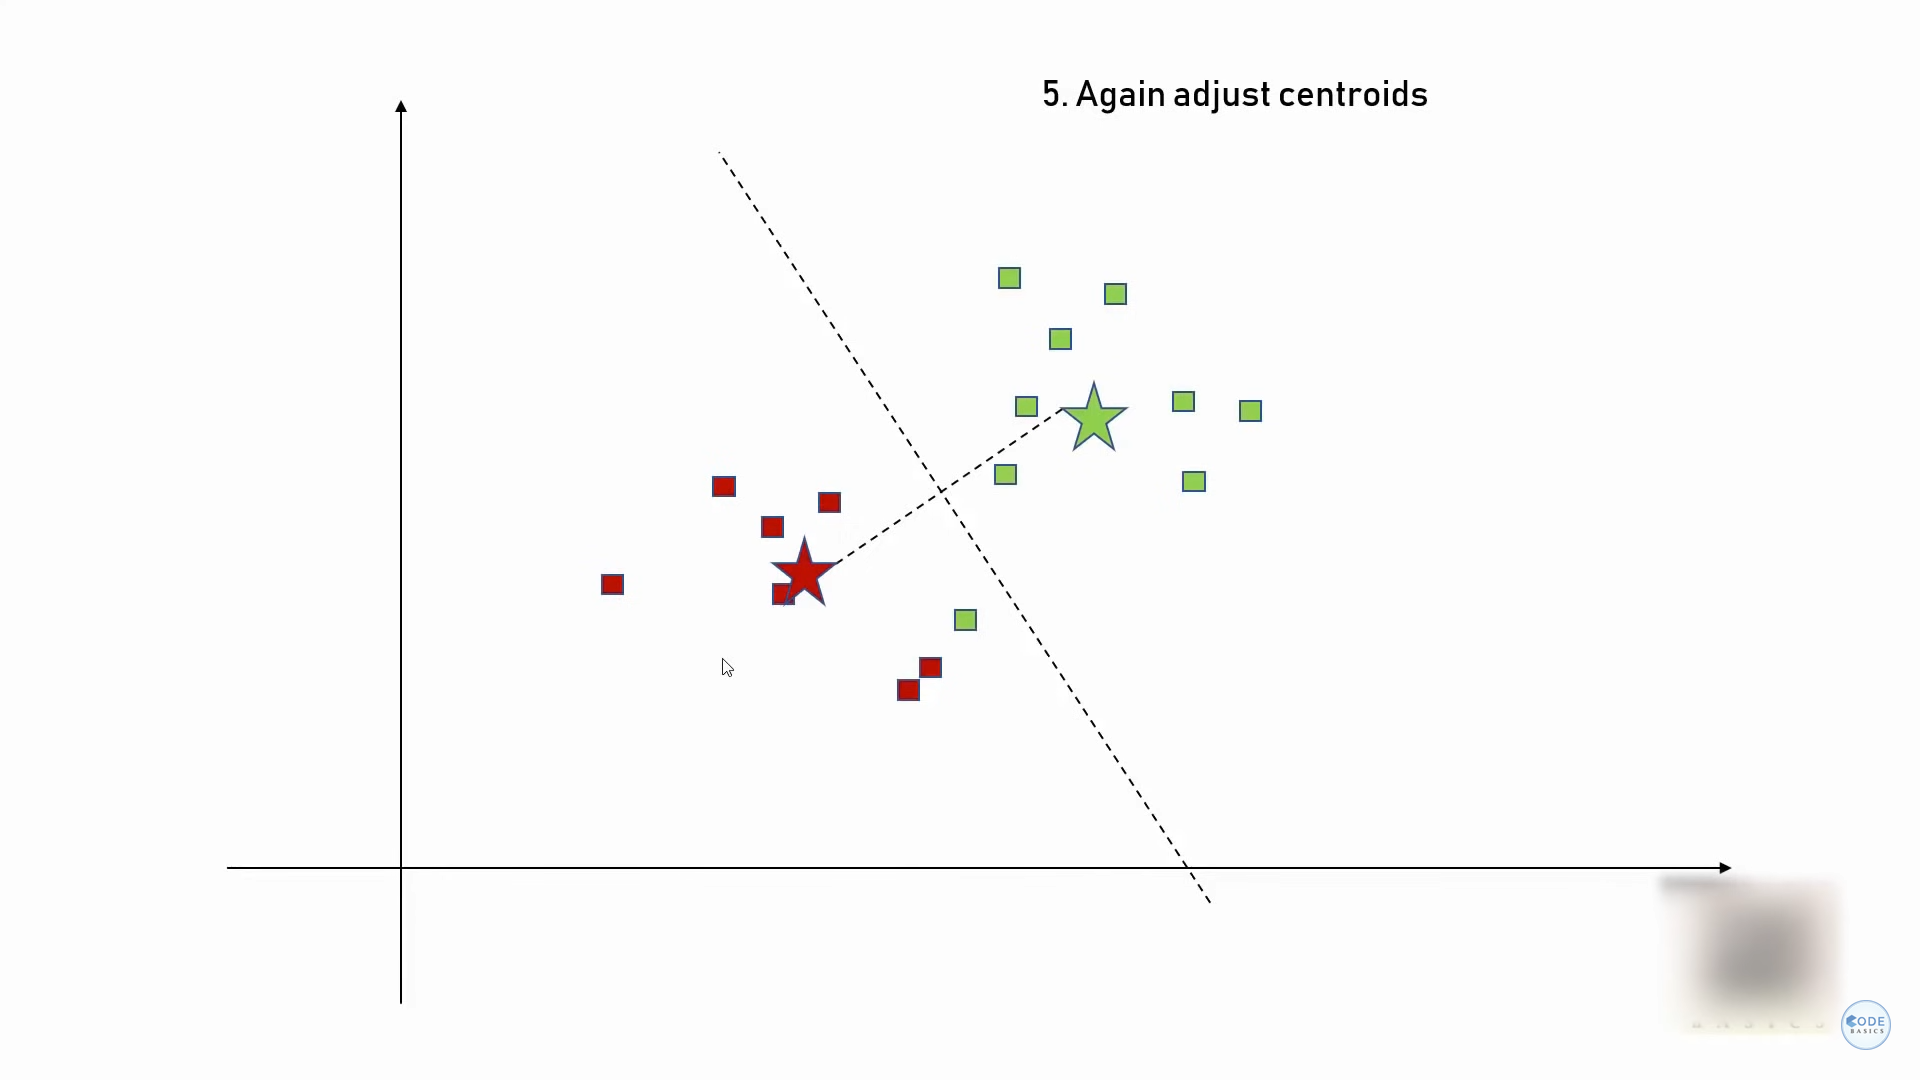

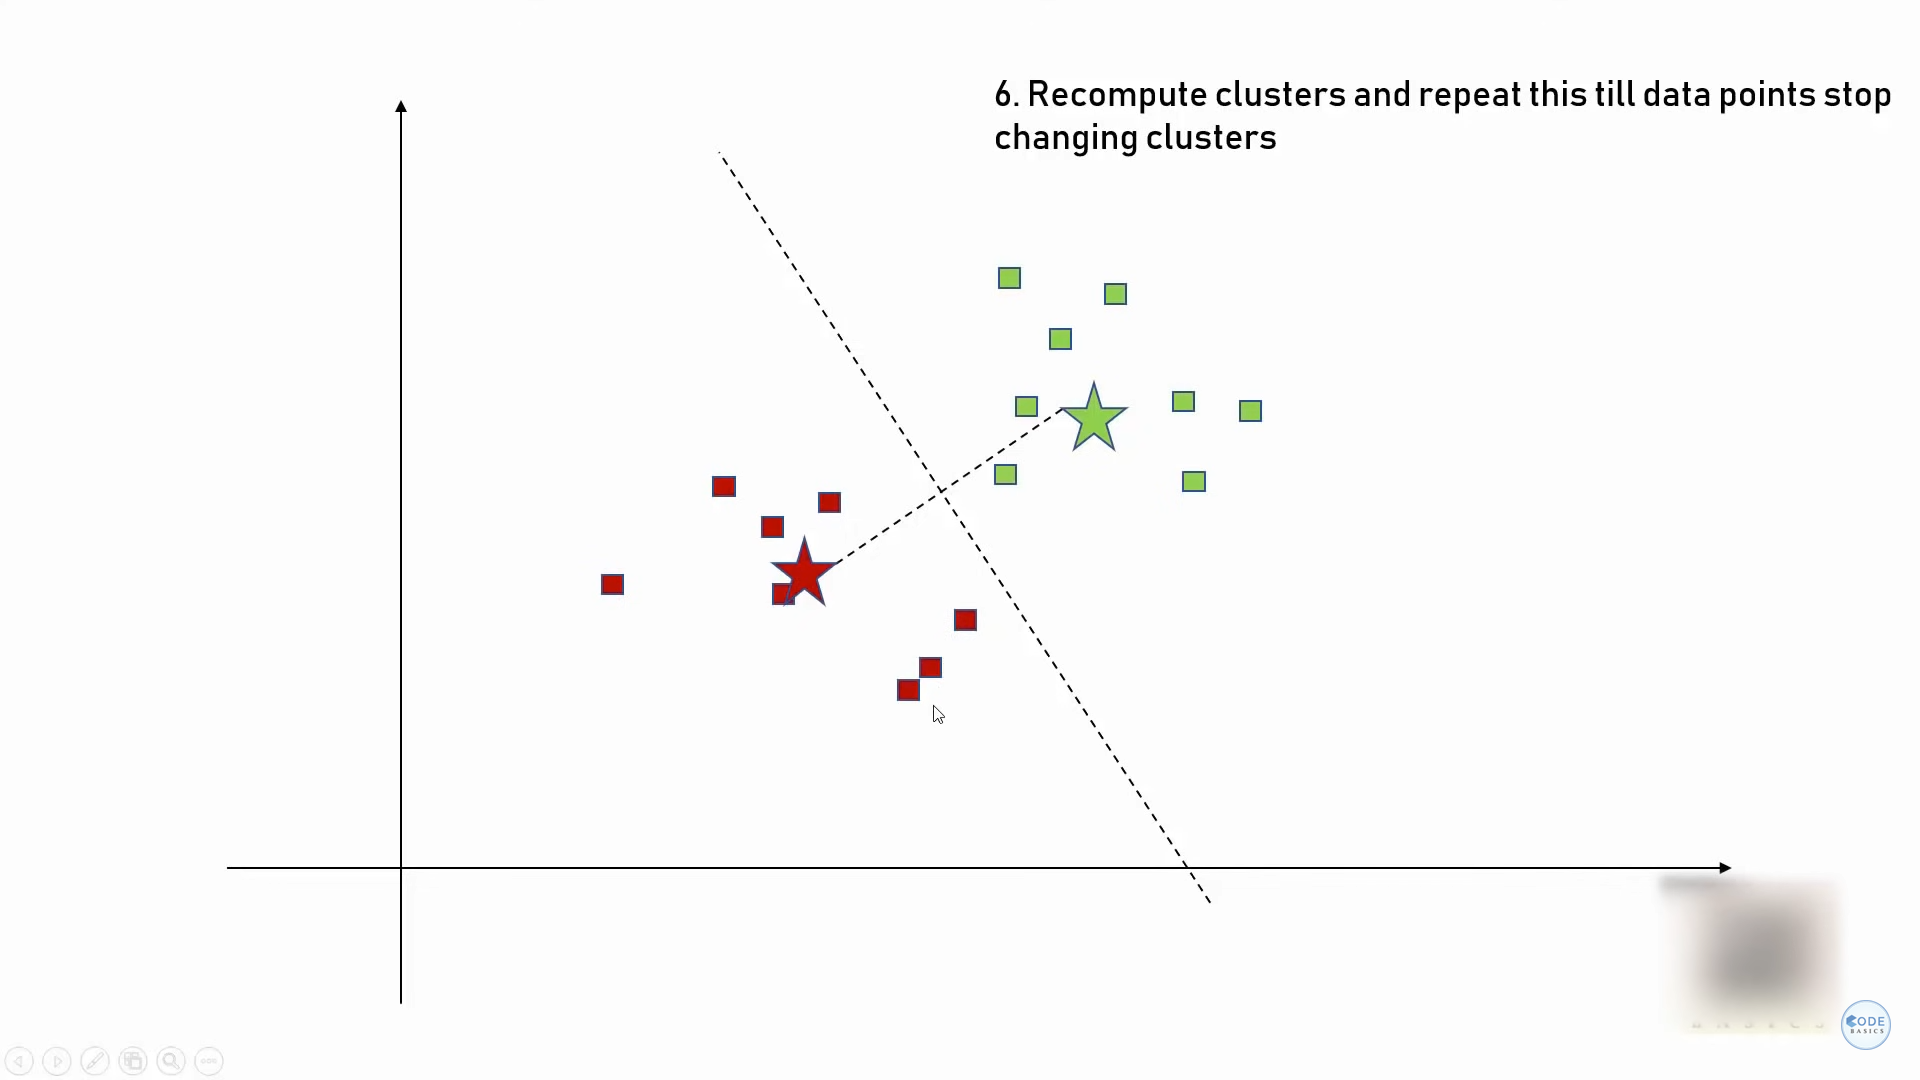

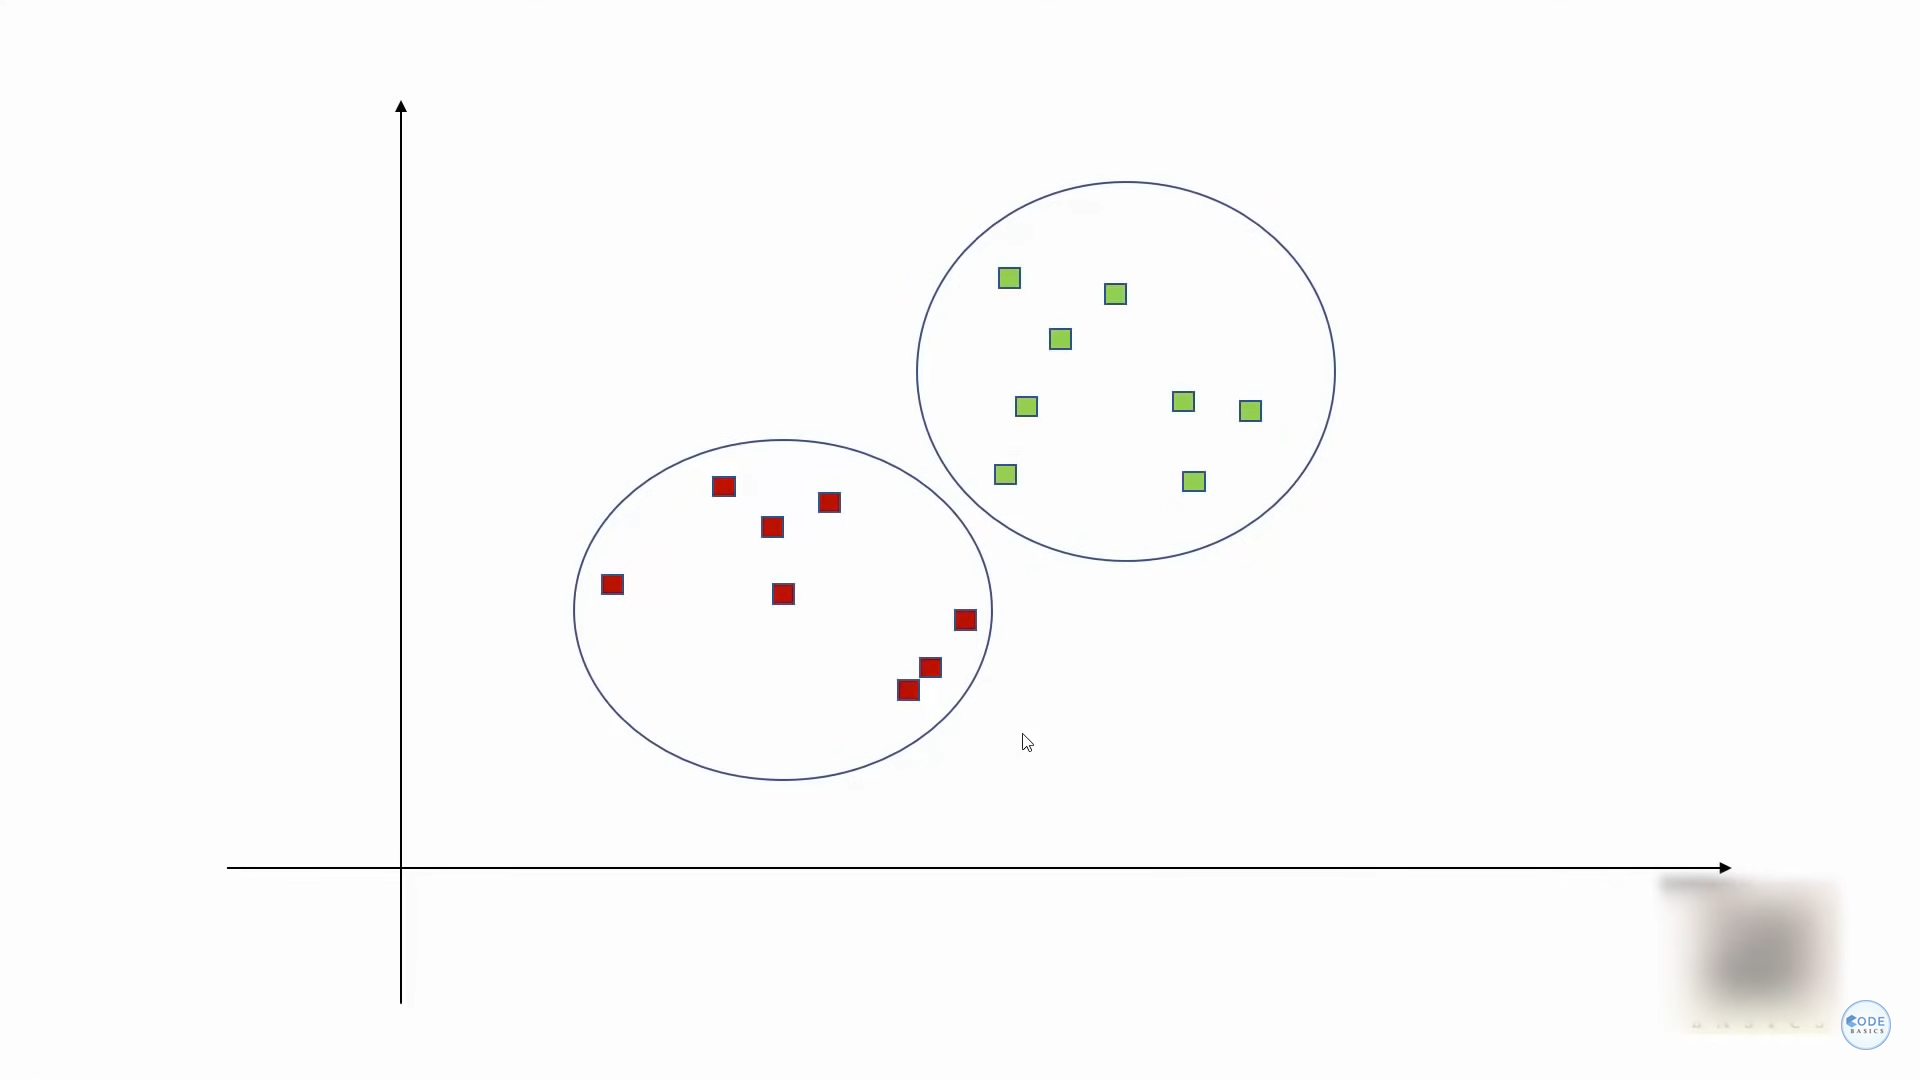

Now we have to find the K value for making such cluster

How to determine correct numbers of cluster?

### Elbow method

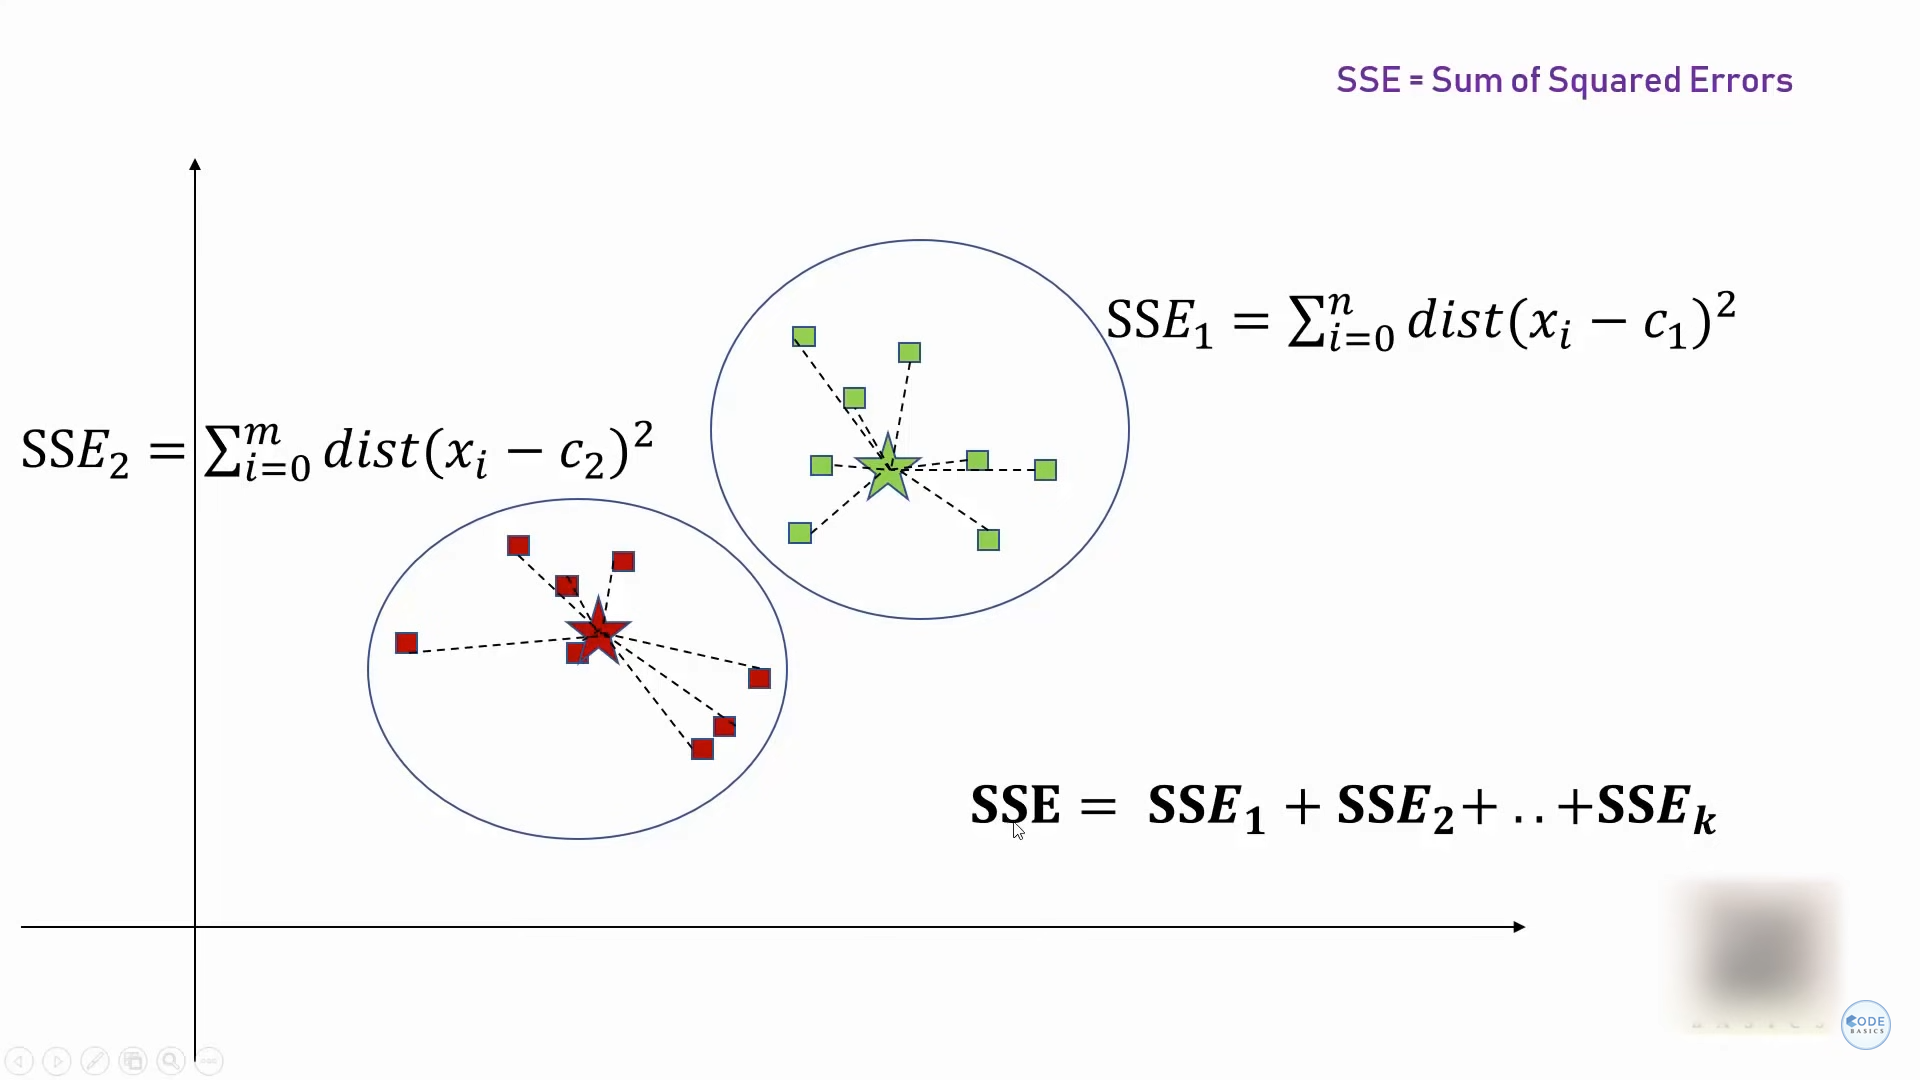

First randomly choose k value and calculate the SSE

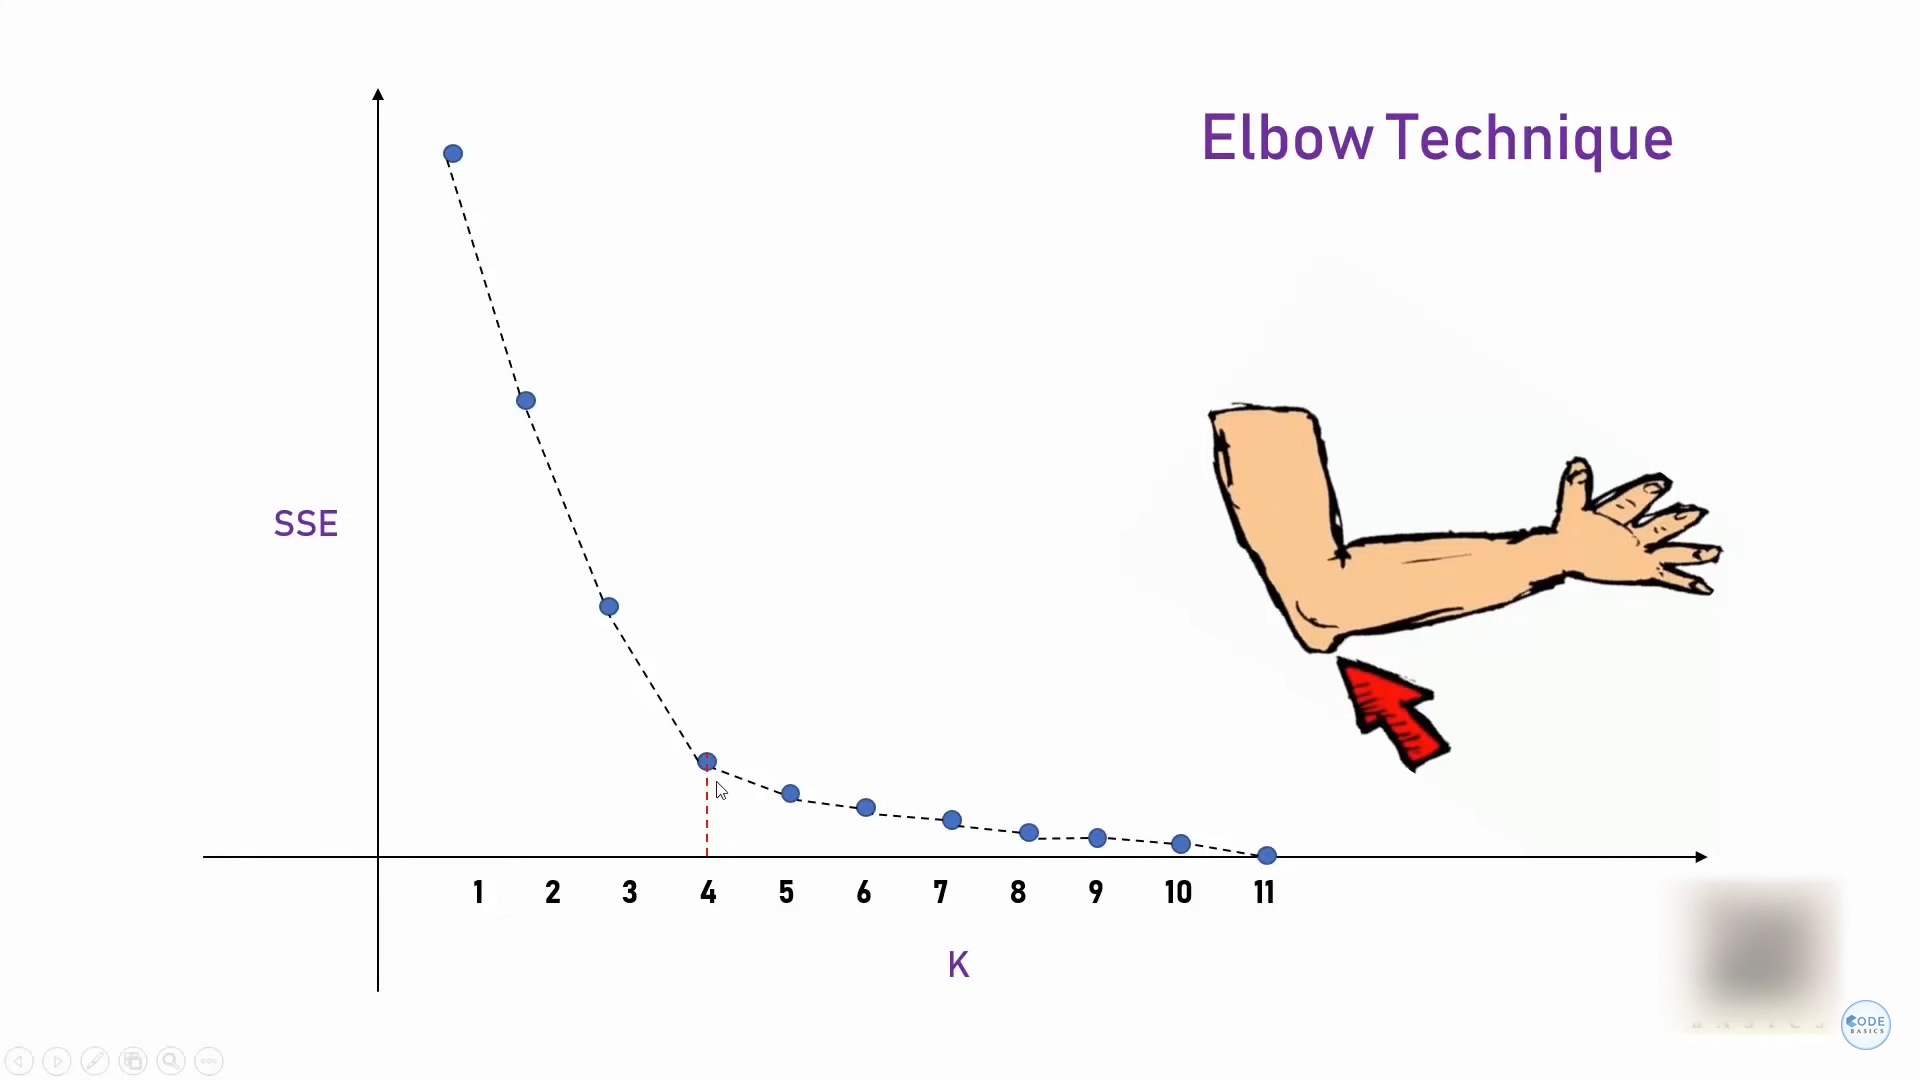

Then find the knee of the graph ploted for the different k values

In [3]:
import pandas as pd

In [4]:
import requests
import io

url = "https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv"

download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


So here we have the data , now based on it we can say that the trend of salary may be depends on different factors like age , place, profession etc. so how many factors are there we can find using K_Means_clustering



## Essential libraries

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

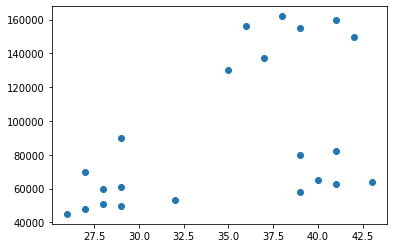

In [7]:
plt.scatter(df['Age'],df['Income($)'])

As we can see , the  value of cluster is 3

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
# now we are going to apply kmeans here
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [10]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [11]:
#plotting the clustered  part

In [12]:
df['cluster'] = y_predicted

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]



No handles with labels found to put in legend.


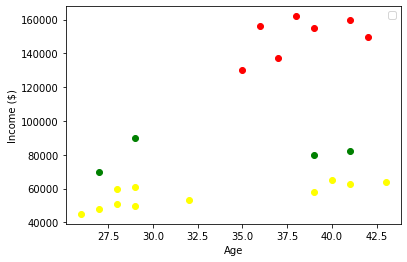

In [17]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='yellow')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()



why we are getting the green data in so different area its because of our x-axis and y-axis scaling . 

For Correcting it we will use MinMax preprocessing

In [20]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [21]:
# all the values between 0 to 1

In [24]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


applying again

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
df['cluster']=y_predicted

In [27]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


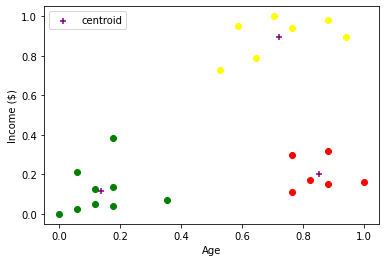

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='yellow')

# plotting the centres
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Now we have to find the centroids 

In [31]:
km.cluster_centers_ # they will give x and y coordinates

array([[0.13725489, 0.11633428],
       [0.85294116, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

Above we have taken k value randomly now we will use elbow method

In [34]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    # inertia_ calculate the sse
    sse.append(km.inertia_)
    

In [35]:
sse

[5.434011494026171,
 2.091136383082893,
 0.47507836152286115,
 0.3491047284164542,
 0.2664030316475836,
 0.21055481576475257,
 0.17536969260364912,
 0.14247583684387896,
 0.11612805737209943]

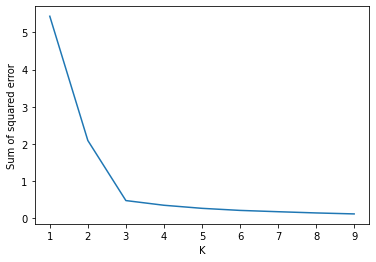

In [36]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

So we are getting the knee at 3